In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("energy_data.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.head()


,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01 00:00:00,152,0,56,0,208
2023-01-01 01:00:00,116,0,0,0,116
2023-01-01 02:00:00,0,0,36,0,36
2023-01-01 03:00:00,92,0,75,1063,1230
2023-01-01 04:00:00,130,0,46,0,176


In [4]:
import os
os.getcwd()

'C:\\Users\\Admin'

In [6]:
data_path = "energy_data.csv"

In [7]:
df.to_csv("energy_data.csv", index=False)
print("Data saved as energy_data.csv")


Data saved as energy_data.csv


In [10]:
import pandas as pd
import numpy as np


date_rng = pd.date_range(start='2023-01-01', end='2023-06-30', freq='h')


df = pd.DataFrame(date_rng, columns=['timestamp'])

# Fridge
df['fridge'] = np.random.randint(50, 200, size=len(date_rng)) * \
               np.random.choice([0, 1], size=len(date_rng), p=[0.3, 0.7])

# AC
month = df['timestamp'].dt.month
ac_prob = np.where(month >= 4, 0.8, 0.1)
df['ac'] = np.random.randint(1000, 2500, size=len(date_rng)) * \
           np.random.binomial(1, ac_prob)

# Lights 
hour = df['timestamp'].dt.hour
light_prob = np.where((hour >= 18) | (hour <= 6), 0.9, 0.1)
df['lights'] = np.random.randint(20, 100, size=len(date_rng)) * \
               np.random.binomial(1, light_prob)

# Microwave
df['microwave'] = np.random.randint(800, 1200, size=len(date_rng)) * \
                  np.random.choice([0, 1], size=len(date_rng), p=[0.9, 0.1])

# Total Power
df['total_power'] = df['fridge'] + df['ac'] + df['lights'] + df['microwave']


df.to_csv("energy_data.csv", index=False)

print("✅ energy_data.csv created successfully!")

✅ energy_data.csv created successfully!


In [ ]:
df = pd.read_csv("energy_data.csv")
df.head()

In [20]:
df = pd.read_csv("energy_data.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.head()

,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01 00:00:00,98,0,55,0,153
2023-01-01 01:00:00,157,0,72,0,229
2023-01-01 02:00:00,0,0,77,0,77
2023-01-01 03:00:00,0,0,78,0,78
2023-01-01 04:00:00,142,2129,76,0,2347


In [19]:
df.info()
df.isnull().sum()
df.isnull().sum()

<class 'pandas.DataFrame'>
DatetimeIndex: 4321 entries, 2023-01-01 00:00:00 to 2023-06-30 00:00:00
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   fridge       4321 non-null   int64
 1   ac           4321 non-null   int64
 2   lights       4321 non-null   int64
 3   microwave    4321 non-null   int64
 4   total_power  4321 non-null   int64
dtypes: int64(5)
memory usage: 202.5 KB


TypeError: NDFrame.fillna() got an unexpected keyword argument 'method'

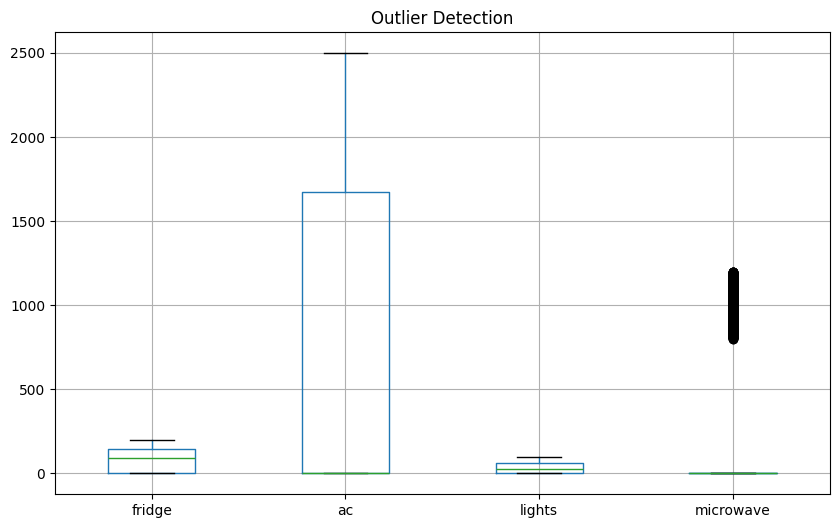

In [14]:
plt.figure(figsize=(10,6))
df[['fridge','ac','lights','microwave']].boxplot()
plt.title("Outlier Detection")
plt.show()

In [15]:
daily_data = df.resample('D').mean()
daily_data.head()

,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,95.916667,226.250000,39.833333,126.666667,488.666667
2023-01-02,85.750000,151.375000,34.083333,0.000000,271.208333
2023-01-03,97.958333,308.375000,30.166667,209.583333,646.083333
2023-01-04,93.625000,92.958333,34.250000,93.166667,314.000000
2023-01-05,101.708333,321.458333,43.625000,176.458333,643.250000


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_values = scaler.fit_transform(df[['fridge','ac','lights','microwave','total_power']])

df_scaled = pd.DataFrame(scaled_values,
                         columns=['fridge','ac','lights','microwave','total_power'])

df_scaled.head()

,fridge,ac,lights,microwave,total_power
0,0.492462,0.000000,0.555556,0.0,0.040724
1,0.788945,0.000000,0.727273,0.0,0.060953
2,0.000000,0.000000,0.777778,0.0,0.020495
3,0.000000,0.000000,0.787879,0.0,0.020761
4,0.713568,0.852282,0.767677,0.0,0.624701


In [17]:
from sklearn.model_selection import train_test_split

X = df[['fridge','ac','lights','microwave']]
y = df['total_power']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, shuffle=False)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, shuffle=False)

print("Training size:", len(X_train))
print("Validation size:", len(X_val))
print("Testing size:", len(X_test))

Training size: 3024
Validation size: 648
Testing size: 649
